# Projeto 1 - Ciência dos Dados

Nome: Lucas Levi Vaz

Nome: Rodrigo Lee

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [73]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import svm

In [74]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
v:\Documents\Github\22-2a-cd-p1-grupo_rodrigol5\notebooks


Carregando a base de dados com as notícias classificadas manualmente:

In [75]:
filename = '../data/dados.xlsx'

In [76]:
train = pd.read_excel(filename, sheet_name = 'Treinamento')
train.head(5)

,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target
0,Comprar ou vender?,"Com commodities caindo, correr para as small c...",A piora do cenário macro global levou a uma qu...,02/08/2022 - 17:52,36,0
1,Bula do Mercado,Ibovespa hoje: Marasmo no exterior e agenda va...,O Ibovespa pode receber influência do sinal ne...,19/08/2022 - 8:07,22,0
2,Fusões & Aquisições,Prisma Capital se torna titular de 56% da Domm...,"A Dommo Energia (DMMO3), antiga OGX de Eike Ba...",06/09/2022 - 8:07,4,0
3,Combustíveis,Bolsonaro diz que diesel importado da Rússia p...,"O presidente Jair Bolsonaro afirmou, nesta seg...",11/07/2022 - 11:45,67,1
4,Mercados,Petrobras (PETR4) salta 3% com reinvestimento ...,A Petrobras (PETR3; PETR4) fechou o último pre...,31/08/2022 - 17:25,9,2


In [77]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target
0,MT Labs,Não é Petrobras: esta petrolífera pode valoriz...,"Ao abrir um site de notícias sobre economia, é...",18/07/2022 - 12:00,56,2
1,Economia,"Preço do diesel sobe mais de 60%, aponta IPCA-15","No acumulado dos últimos 12 meses, o preço do ...",26/07/2022 - 10:34,46,2
2,Zona do Euro,Congelamento de preços na França prova que a E...,"Ontem, o Carrefour anunciou que vai congelar o...",23/08/2022 - 16:28,19,0
3,Europa,Índice europeu STOXX 600 recua pressionado por...,O índice STOXX 600 fechou em baixa nesta quart...,07/09/2022 - 14:16,2,0
4,Moedas,"Nervosismo externo faz dólar subir para R$ 5,37",A trégua no mercado financeiro durou pouco. Ap...,11/07/2022 - 19:35,66,0


___
## Classificador automático


Faça aqui uma descrição do seu assunto e o que considerou como relevante ou não relevante na classificação das notícias (Target).

0 - irrelevante,
<br>1 - relevante,
<br>2 - muito relevante.

É classificado a partir desses targets, se mereçem destaque, ou possam ajudar investidores em petróleo.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [78]:
import re 


def cleanup(text):

    punctuation = '[!-.:?;]'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed
    

In [79]:
todas_palavras = []
palavras0 = []
palavras1 = []
palavras2 = []

i = 0
while i < len(train):
    linha = cleanup(str(train['PrimeiroParag'][i]).lower())
    linha_split = linha.split()
    x = train.iloc[i]['Target']
    
    for palavra in linha_split:
        todas_palavras.append(palavra)
        if x == 0:
            palavras0.append(palavra)
        if x == 1:
            palavras1.append(palavra)
        if x == 2:
            palavras2.append(palavra)

    i+=1

In [80]:
tabela_todas_palavras = pd.Series(todas_palavras)
tabela_todas_palavras_absoluta = tabela_todas_palavras.value_counts()
qnt_total = len(tabela_todas_palavras_absoluta)

tabela_palavras0 = pd.Series(palavras0)
tabela_palavras_absoluta0 = tabela_palavras0.value_counts()
qnt0 = len(palavras0)
P_0 = qnt0/qnt_total

tabela_palavras1 = pd.Series(palavras1)
tabela_palavras_absoluta1 = tabela_palavras1.value_counts()
qnt1 = len(palavras1)
P_1 = qnt1/qnt_total

tabela_palavras2 = pd.Series(palavras2)
tabela_palavras_absoluta2 = tabela_palavras2.value_counts()
qnt2 = len(palavras2)
P_2 = qnt2/qnt_total

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [81]:
lista_prob = []
lista_target = []

i = 0
while i < len(test):
    linha = cleanup(str(test['PrimeiroParag'][i]).lower())
    linha_split = linha.split()
    x = test.iloc[i]['Target']
    
    P_palavra_dado_0 = 1
    P_palavra_dado_1 = 1
    P_palavra_dado_2 = 1

    P_0_dado_frase = 1
    P_1_dado_frase = 1
    P_2_dado_frase = 1


    #Calcula a probabilidade da palavra estar em um target
    for palavra in linha_split:
        if palavra in tabela_palavras_absoluta0:
            P_palavra_dado_0 *= (1 + tabela_palavras_absoluta0[palavra])/(qnt0 + qnt_total)
        else:
            P_palavra_dado_0 = 1/(qnt0 + qnt_total)
        
        if palavra in tabela_palavras_absoluta1:
            P_palavra_dado_1 *= (1 + tabela_palavras_absoluta1[palavra])/(qnt1 + qnt_total)
        else:
            P_palavra_dado_1 = 1/(qnt1 + qnt_total)
        
        if palavra in tabela_palavras_absoluta2:
            P_palavra_dado_2 *= (1 + tabela_palavras_absoluta2[palavra])/(qnt2 + qnt_total)
        else:
            P_palavra_dado_2 = 1/(qnt2 + qnt_total)

        P_0_dado_palavra = P_palavra_dado_0 * P_0
        P_1_dado_palavra = P_palavra_dado_1 * P_1
        P_2_dado_palavra = P_palavra_dado_2 * P_2


        #Calcula a probabilidade da frase inteira estar em um target
        if P_0_dado_palavra >= P_1_dado_palavra and P_0_dado_palavra >= P_2_dado_palavra:
            P_0_dado_frase *= P_0_dado_palavra

        if P_1_dado_palavra >= P_0_dado_palavra and P_1_dado_palavra >= P_2_dado_palavra:
            P_1_dado_frase *= P_1_dado_palavra

        if P_2_dado_palavra >= P_1_dado_palavra and P_2_dado_palavra >= P_0_dado_palavra:
            P_2_dado_frase *= P_2_dado_palavra



    #Verifica a qual target a frase inteira pertence e add ifo nas listas
    if P_0_dado_frase >= P_1_dado_frase and P_0_dado_frase >= P_2_dado_frase:
        lista_target.append(0)
        lista_prob.append(P_0_dado_frase)

    elif P_2_dado_frase >= P_1_dado_frase and P_2_dado_frase >= P_0_dado_frase:
        lista_target.append(2)
        lista_prob.append(P_2_dado_frase)

    elif P_1_dado_frase >= P_0_dado_frase and P_1_dado_frase >= P_2_dado_frase:
        lista_target.append(1)
        lista_prob.append(P_1_dado_frase)

        
    i+=1


In [82]:
print(len(lista_prob))
print(len(lista_target))

300
300


In [83]:
matriz_confusao = confusion_matrix(test['Target'],lista_target)

true0_predict0 = matriz_confusao[0][0]
true0_predict1 = matriz_confusao[0][1]
true0_predict2 = matriz_confusao[0][2]

true1_predict0 = matriz_confusao[1][0]
true1_predict1 = matriz_confusao[1][1]
true1_predict2 = matriz_confusao[1][2]

true2_predict0 = matriz_confusao[2][0]
true2_predict1 = matriz_confusao[2][1]
true2_predict2 = matriz_confusao[2][2]

print(matriz_confusao)

Acuracia = (true0_predict0 + true1_predict1 + true2_predict2) / (true0_predict0+true0_predict1+true0_predict2+true1_predict0+true1_predict1+true1_predict2+true2_predict0+true2_predict1+true2_predict2)

print(Acuracia)

[[48 83 52]
 [10 30 13]
 [ 9 43 12]]
0.3


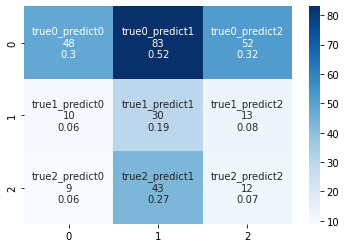

In [84]:
#Criar matriz de confusão

group_names = ['true0_predict0', 'true0_predict1', 'true0_predict2', 'true1_predict0', 'true1_predict1', 'true1_predict2', 'true2_predict0', 'true2_predict1', 'true2_predict2']
group_counts = [true0_predict0, true0_predict1, true0_predict2, true1_predict0, true1_predict1, true1_predict2, true2_predict0, true2_predict1, true2_predict2]

group_percentages = []
for i in group_counts:
    group_percentages.append(round((i/len(todas_palavras))*100,2))

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)

#Cria um heatmap
sns.heatmap(matriz_confusao, annot=labels, fmt='', cmap='Blues')
plt.show()

___
### Concluindo

Mensagems sarcásticas:
Por se tratar de um site de notícias financeiro, não é esperado tantas notícias sarcástiscas. Portanto não foi necessário surgir com algum modo para tratá-las.

Mensagems de dupla negação:
Não temos o ferramentário para tratar de mensagems com dupla negação, pois usamos as probabilidades e porcentagems de palavras estarem presente, e não analisamos totalmente o contexto dessas mesmas palavras.

Pois com mais investimentos, maior será a acurácia do classificador, já que poderímos estar trabalhando com uma base de dados maior, targets mais específicas, diferentes combinações de contagens etc. Visto que o nosso assunto é "petróleo", o produto gerado pelo classificador pode ter grande relevância para investidores de ações petroleiras, por exemplo. Além disso, com um classificador mais eficaz, poderíamos fazer uma expansão para temas mias impactantes.

Se alimentássemos a base de treinamento com novas notícias, utilizando o classificador que é dependente dessa mesma base, isso resultaria
em uma referência circular no qual as novas notícias seriam selecionadas baseado nos Targets já definidos. 
Portanto, o classificador estaria treinando a base de dados a partir de si mesma. Não estaria sendo treinada, apenas se repetindo.

___
### Qualidade do Classificador a partir de novas separações das notícias entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [71]:
guarda_resultados = []
historico_acertos = []
porcentagem_irrelevantes = []
porcentagem_relevantes = []
porcentagem_m_relevantes = []

contador = 0
#Roda 100 vezes para testar a qualidade do classificador a partir de novas separações de notícias
while contador < 100:
    train = pd.read_excel(filename, sheet_name = 'Treinamento')
    test = pd.read_excel(filename, sheet_name = 'Teste')

    novo_dataframe = train.append(test)

    #novo_dataframe

    aleatorio = novo_dataframe.sample(frac = 1)

    from sklearn.model_selection import train_test_split

    #Duas novas bases de dados "train_novo" e "test_novo"
    train_novo, test_novo = train_test_split(aleatorio, test_size=0.6)

    train_novo.reset_index(drop=True, inplace=True)
    test_novo.reset_index(drop=True, inplace=True)

    #=========

    todas_palavras = []
    palavras0 = []
    palavras1 = []
    palavras2 = []

    w = 0
    while w < len(train_novo):
        linha = cleanup(str(train_novo['PrimeiroParag'][w]).lower())
        linha_split = linha.split()
        x = train_novo.iloc[w]['Target']
        
        for palavra in linha_split:
            todas_palavras.append(palavra)
            if x == 0:
                palavras0.append(palavra)
            if x == 1:
                palavras1.append(palavra)
            if x == 2:
                palavras2.append(palavra)

        w+=1

    #=========
    tabela_todas_palavras = pd.Series(todas_palavras)
    tabela_todas_palavras_absoluta = tabela_todas_palavras.value_counts()
    qnt_total = len(tabela_todas_palavras_absoluta)

    tabela_palavras0 = pd.Series(palavras0)
    tabela_palavras_absoluta0 = tabela_palavras0.value_counts()
    qnt0 = len(palavras0)
    P_0 = qnt0/qnt_total

    tabela_palavras1 = pd.Series(palavras1)
    tabela_palavras_absoluta1 = tabela_palavras1.value_counts()
    qnt1 = len(palavras1)
    P_1 = qnt1/qnt_total

    tabela_palavras2 = pd.Series(palavras2)
    tabela_palavras_absoluta2 = tabela_palavras2.value_counts()
    qnt2 = len(palavras2)
    P_2 = qnt2/qnt_total

    #=========

    lista_prob = []
    lista_target = []

    b = 0
    while b < len(test_novo):
        linha = cleanup(str(test_novo['PrimeiroParag'][b]).lower())
        linha_split = linha.split()
        x = test_novo.iloc[b]['Target']
        
        P_palavra_dado_0 = 1
        P_palavra_dado_1 = 1
        P_palavra_dado_2 = 1

        P_0_dado_frase = 1
        P_1_dado_frase = 1
        P_2_dado_frase = 1


        #Calcula a probabilidade da palavra estar em um target
        for palavra in linha_split:
            if palavra in tabela_palavras_absoluta0:
                P_palavra_dado_0 *= (1 + tabela_palavras_absoluta0[palavra])/(qnt0 + qnt_total)
            else:
                P_palavra_dado_0 = 1/qnt0 + qnt_total
            
            if palavra in tabela_palavras_absoluta1:
                P_palavra_dado_1 *= (1 + tabela_palavras_absoluta1[palavra])/(qnt1 + qnt_total)
            else:
                P_palavra_dado_1 = 1/qnt1 + qnt_total
            
            if palavra in tabela_palavras_absoluta2:
                P_palavra_dado_2 *= (1 + tabela_palavras_absoluta2[palavra])/(qnt2 + qnt_total)
            else:
                P_palavra_dado_2 = 1/qnt2 + qnt_total

            P_0_dado_palavra = P_palavra_dado_0 * P_0
            P_1_dado_palavra = P_palavra_dado_1 * P_1
            P_2_dado_palavra = P_palavra_dado_2 * P_2


            #Calcula a probabilidade da frase inteira estar em um target
            if P_0_dado_palavra >= P_1_dado_palavra and P_0_dado_palavra >= P_2_dado_palavra:
                P_0_dado_frase *= P_0_dado_palavra

            if P_1_dado_palavra >= P_0_dado_palavra and P_1_dado_palavra >= P_2_dado_palavra:
                P_1_dado_frase *= P_1_dado_palavra

            if P_2_dado_palavra >= P_1_dado_palavra and P_2_dado_palavra >= P_0_dado_palavra:
                P_2_dado_frase *= P_2_dado_palavra



        #Verifica a qual target a frase inteira pertence e add ifo nas listas
        if P_0_dado_frase >= P_1_dado_frase and P_0_dado_frase >= P_2_dado_frase:
            lista_target.append(0)
            lista_prob.append(P_0_dado_frase)

        elif P_2_dado_frase >= P_1_dado_frase and P_2_dado_frase >= P_0_dado_frase:
            lista_target.append(2)
            lista_prob.append(P_2_dado_frase)

        elif P_1_dado_frase >= P_0_dado_frase and P_1_dado_frase >= P_2_dado_frase:
            lista_target.append(1)
            lista_prob.append(P_1_dado_frase)

            
        b+=1

    #=========

    matriz_confusao = confusion_matrix(test_novo['Target'],lista_target)

    true0_predict0 = matriz_confusao[0][0] #Verdadeiro irrelevante
    true0_predict1 = matriz_confusao[0][1]
    true0_predict2 = matriz_confusao[0][2]

    true1_predict0 = matriz_confusao[1][0]
    true1_predict1 = matriz_confusao[1][1] #verdadeiro relevante
    true1_predict2 = matriz_confusao[1][2]

    true2_predict0 = matriz_confusao[2][0]
    true2_predict1 = matriz_confusao[2][1]
    true2_predict2 = matriz_confusao[2][2] #verdadeiro muito relevante

    soma_total = (true0_predict0+true0_predict1+true0_predict2+true1_predict0+true1_predict1+true1_predict2+true2_predict0+true2_predict1+true2_predict2)

    #print(true2_predict0)
    #print(matriz_confusao)

    #=========

    group_counts_novo = [true0_predict0, true1_predict1, true2_predict2]

    porcentagem_de_acertos = [(true0_predict0/450), (true1_predict1/450), (true2_predict2/450)]

    porcentagem_irrelevantes.append(true0_predict0/450)
    porcentagem_relevantes.append(true1_predict1/450)
    porcentagem_m_relevantes.append(true2_predict2/450)

    guarda_resultados.append(group_counts_novo)

    contador += 1


soma_lv_irrelevante = 0
soma_lv_relevante = 0
soma_lv_m_relevante = 0

for lista_valor in guarda_resultados:
    lv_irrelevante = lista_valor[0]
    lv_relevante = lista_valor[1]
    lv_m_irrelevante = lista_valor[2]
    
    soma_lv_irrelevante += lv_irrelevante
    soma_lv_relevante += lv_relevante
    soma_lv_m_relevante += lv_m_irrelevante

porcentagem_lv_irrelevante = soma_lv_irrelevante/(450*(len(guarda_resultados)))
porcentagem_lv_relevante = soma_lv_relevante/(450*(len(guarda_resultados)))
porcentagem_lv_m_relevante = soma_lv_m_relevante/(450*(len(guarda_resultados)))

lista_essas_porcentagems = ((porcentagem_lv_irrelevante*100), (porcentagem_lv_relevante*100), (porcentagem_lv_m_relevante*100))


print(guarda_resultados)

print(lista_essas_porcentagems)

print(historico_acertos)

[[112, 12, 19], [144, 7, 6], [139, 12, 12], [133, 9, 22], [130, 12, 12], [136, 11, 18], [138, 8, 7], [131, 10, 15], [137, 15, 23], [127, 11, 16], [121, 7, 13], [128, 11, 17], [118, 8, 20], [127, 12, 14], [129, 9, 17], [141, 11, 12], [159, 11, 9], [119, 14, 13], [135, 11, 14], [120, 11, 11]]
(29.15555555555556, 2.3555555555555556, 3.2222222222222223)
[]


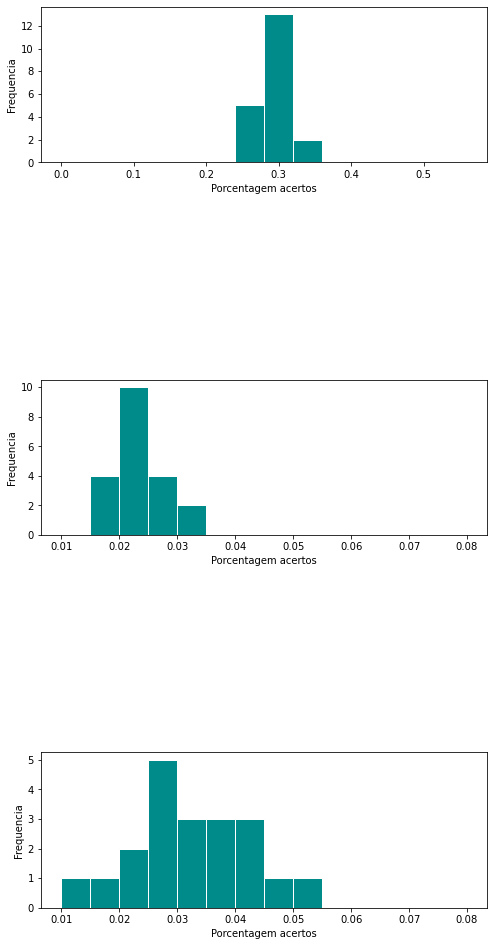

In [72]:
acertos_irrelevantes = pd.Series(porcentagem_irrelevantes)
acertos_relevantes = pd.Series(porcentagem_relevantes)
acertos_m_relevantes = pd.Series(porcentagem_m_relevantes)

faixa1 = np.arange(0,0.6,0.04)
faixa2 = np.arange(0.01,0.08,0.005)
fig = plt.figure(figsize=(8, 20))

plt.subplot(611)
plt.hist(acertos_irrelevantes, bins=faixa1, color='darkcyan', edgecolor='white')
plt.title('')
plt.ylabel('Frequencia')
plt.xlabel('Porcentagem acertos')

plt.subplot(613)
plt.hist(acertos_relevantes, bins=faixa2, color='darkcyan', edgecolor='white')
plt.title('')
plt.ylabel('Frequencia')
plt.xlabel('Porcentagem acertos')

plt.subplot(615)
plt.hist(acertos_m_relevantes, bins=faixa2, color='darkcyan', edgecolor='white')
plt.title('')
plt.ylabel('Frequencia')
plt.xlabel('Porcentagem acertos')


plt.show()

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nas notícias. Ex: stemming, lemmatization, stopwords
* CONSIDEROU mais de duas caterogias na variável Target e INCREMENTOU a quantidade de notícias, mantendo pelo menos 250 notícias por caterogia (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* Para Target com duas categorias: CRIOU pelo menos quatro categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das Notícias entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**